# Einführung Multi-Variate Datenanalyse (MVDA)

## Übung 4: Datenvorverarbeitung (data preprocessing)

für Kurse Mathematische Berechnungssoftware (MBS)

_Simeon Sauer, SS2020_

### 0 - benötigte python-Module laden

In [1]:
import pandas as pd # Bibliothek zum Einlesen / Verwalten / Verarbeiten von tabellarischen Daten
import matplotlib.pyplot as plt # Bibliothek zum Plotten / Visualisieren

### 1 - csv-Datei mit Trainingdaten einlesen

Quelle des Datensatzes:
https://www.kaggle.com/c/bioresponse

(Datensatz hier leicht verändert, z.B. fehldende und ungültige Werte hinzugefügt)

In [2]:
dat_raw = pd.read_csv('MBS_C4_dataset.csv')
dat_raw.head() # die ersten 5 Zeilen ausgeben, um zu schauen ob csv-import Funtioniert hat

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1.0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1.0,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def print_colrow_no(df):
    print('Anzahl Zeilen:', df.shape[0], '; Anzahl Spalten:', df.shape[1])
    
print_colrow_no(dat_raw)

Anzahl Zeilen: 3751 ; Anzahl Spalten: 1777


### 2 - deskriptive Statistik

In [4]:
dat_raw.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3749.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.568152,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,1.683449,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3 - ungültigen Wert `99` für Variable `Activity` streichen

In [5]:
## Alternative 1:
dat_clean = dat_raw[dat_raw['Activity'] != 99]

## Alterative 2:
# dat_clean = dat_raw[dat_raw['Activity'].isin([0, 1])]

## Alternative 3:
#dat_clean = dat_raw
#dat_clean['Activity'].replace(99, pd.NA, inplace=True)

print_colrow_no(dat_clean)

Anzahl Zeilen: 3750 ; Anzahl Spalten: 1777


In [6]:
# sanity check: Welche Werte nimmt 'Activity' jetzt noch an?
dat_clean['Activity'].unique()

array([ 1.,  0., nan])

### 4 - missing values behandeln

welche Variablen haben überhaupt fehlende Werte (_missing values_ bzw. _not-a-number_, kurz `NaN`)?

In [7]:
# dazu können wir z.B. eine Variable vom Typ 'Dictionary' erzeugen, die diese Information enthält
# Um die Analyse später wiederholen zu können, legen wir sie gleich als Funktion an:
def analyze_NaN(df: pd.DataFrame, drop_zero_NaNs = True) -> dict:
    ''' calculates no of missing values per column of pandas dataframe
    
    Input:
        df ... DataFrame to be analyzed
        drop_zero_NaNs ... drop columns with zero NaN from result
    
    Output:
        NaN_dict ... dictionary with columns of `df` as keys and no of missing values as values
    '''
    
    NaN_dict = {var: df[var].isna().sum()
                for var in dat_raw
                if df[var].isna().sum() > 0 or (not drop_zero_NaNs)}
    
    return NaN_dict # Rückgabewert der Funktion, damit auch Ende der Funktion

analyze_NaN(dat_clean) # Aufruf der Funktion

{'Activity': 2, 'D1044': 1, 'D1589': 1}

In [8]:
# Option 1: Fehlende Daten durch Mittelwert der Spalte ersetzen:
dat = dat_clean.fillna(dat_clean.mean())

In [9]:
# Option 2: Zeilen mit fehlenden Daten löschen:
dat = dat_clean.dropna()

In [10]:
# überprüfen, ob jetzt wirklich alle NaNs weg sind
# (doppelts 'sum()', um über Zeilen *und* Spalten zu summieren)
assert dat.isna().sum().sum() == 0, 'dat_2 enthält immer noch NaNs!'

print_colrow_no(dat)

Anzahl Zeilen: 3746 ; Anzahl Spalten: 1777


### 5 - Daten visualisieren

z.B. als Heatmap

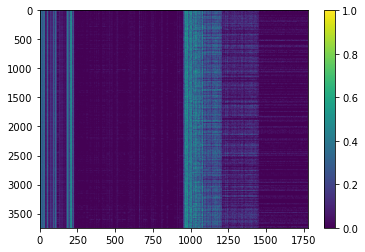

In [11]:
plt.imshow(dat, aspect='auto')
plt.colorbar()
plt.show()